In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('./Dataset/Churn_Modelling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(10000, 14)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df_transformed = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

In [7]:
X = pd.get_dummies(df_transformed, drop_first=True)

In [8]:
X.shape

(10000, 11)

In [9]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
X.shape

(10000, 11)

In [12]:
y = df['Exited']

In [13]:
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = Sequential()

In [2]:
from tensorflow.keras.layers import Input

In [17]:
model.add(Input(shape=(11,)))
model.add(Dense(10, activation='relu'))

In [18]:
model.add(Dense(8, activation='relu'))

In [19]:
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    X_train, y_train,
    epochs = 100,
    batch_size=8,
    verbose=1,
    validation_split=0.1
)

Epoch 1/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8606 - loss: 0.3506 - val_accuracy: 0.8600 - val_loss: 0.3377
Epoch 2/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8615 - loss: 0.3429 - val_accuracy: 0.8637 - val_loss: 0.3329
Epoch 3/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8674 - loss: 0.3345 - val_accuracy: 0.8625 - val_loss: 0.3338
Epoch 4/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8679 - loss: 0.3306 - val_accuracy: 0.8575 - val_loss: 0.3325
Epoch 5/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8663 - loss: 0.3297 - val_accuracy: 0.8600 - val_loss: 0.3333
Epoch 6/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8699 - loss: 0.3283 - val_accuracy: 0.8587 - val_loss: 0.3331
Epoch 7/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8734 - loss: 0.3173 - val_accuracy: 0.8550 - val_loss: 0.3342
Epoch 8/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8646 - loss: 0.3266 - val_accu

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.3477
Test Accuracy: 0.87


In [24]:
pred_prob = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8665

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.50      0.59       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000


Confusion Matrix:
 [[1538   69]
 [ 198  195]]


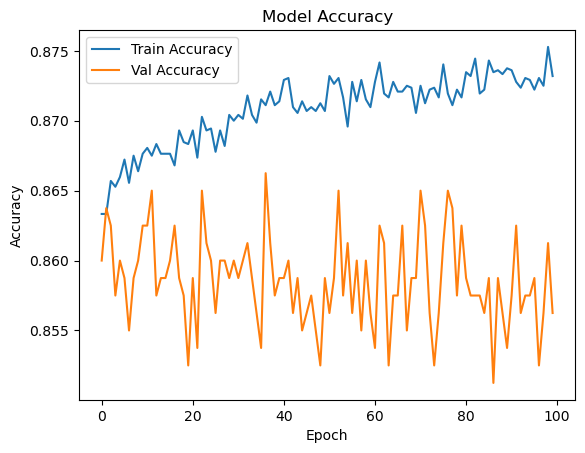

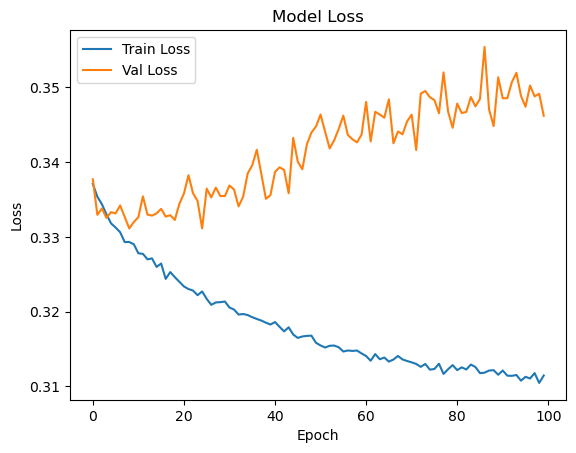

In [27]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# Using more parameters

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Load & Explore Dataset

In [32]:
dataset = pd.read_csv('./Dataset/Churn_Modelling.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Drop Unnecessary Columns

In [34]:
dataset = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

## Split Features and Labels

In [35]:
X = dataset.drop(columns=['Exited'])  # Independent features
y = dataset['Exited']                 # Target (churn)

## One-Hot Encode Categorical Columns

In [36]:
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

## Train-Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Compute Class Weights

In [39]:
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: weights[0], 1: weights[1]}
print("Class Weights:", class_weights)

Class Weights: {0: 0.6293266205160478, 1: 2.4330900243309004}


## Build the ANN Model

In [40]:
model = Sequential()

# Input + First Hidden Layer
model.add(Dense(units=16, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.3))  # Regularization

# Second Hidden Layer
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification


C:\Users\danisha.ansari\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Define Early Stopping

In [42]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

## Train the Model

In [43]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/100
225/225 - 2s - 10ms/step - accuracy: 0.6068 - loss: 0.7140 - val_accuracy: 0.5763 - val_loss: 0.6681
Epoch 2/100
225/225 - 1s - 5ms/step - accuracy: 0.5586 - loss: 0.6533 - val_accuracy: 0.6450 - val_loss: 0.6393
Epoch 3/100
225/225 - 1s - 3ms/step - accuracy: 0.6208 - loss: 0.6203 - val_accuracy: 0.7050 - val_loss: 0.5823
Epoch 4/100
225/225 - 1s - 3ms/step - accuracy: 0.6578 - loss: 0.6022 - val_accuracy: 0.7150 - val_loss: 0.5701
Epoch 5/100
225/225 - 1s - 3ms/step - accuracy: 0.6706 - loss: 0.5926 - val_accuracy: 0.7275 - val_loss: 0.5624
Epoch 6/100
225/225 - 1s - 4ms/step - accuracy: 0.6836 - loss: 0.5800 - val_accuracy: 0.7287 - val_loss: 0.5584
Epoch 7/100
225/225 - 1s - 6ms/step - accuracy: 0.6897 - loss: 0.5761 - val_accuracy: 0.7350 - val_loss: 0.5358
Epoch 8/100
225/225 - 1s - 3ms/step - accuracy: 0.7129 - loss: 0.5666 - val_accuracy: 0.7212 - val_loss: 0.5478
Epoch 9/100
225/225 - 1s - 3ms/step - accuracy: 0.7157 - loss: 0.5559 - val_accuracy: 0.7350 - val_loss

## Make Predictions

In [44]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.6).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


## Evaluate the model

In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.836

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1607
           1       0.58      0.62      0.60       393

    accuracy                           0.84      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.84      0.84      0.84      2000


Confusion Matrix:
 [[1427  180]
 [ 148  245]]


## Plot training history

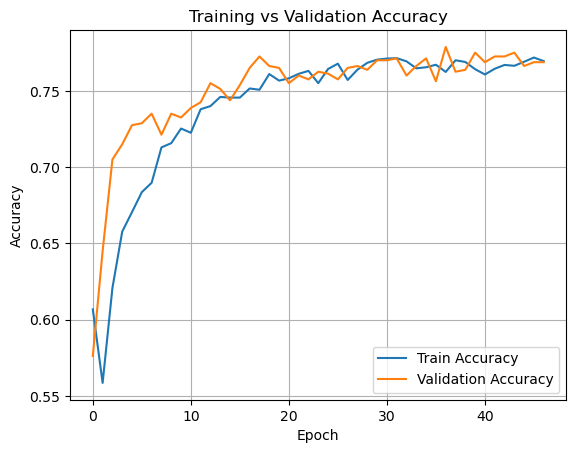

In [47]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()


In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for t in thresholds:
    y_pred_t = (y_pred_prob > t).astype(int)
    precision = precision_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)
    print(f"Threshold = {t:.1f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1-Score: {f1:.3f}")


Threshold = 0.3 | Precision: 0.322 | Recall: 0.908 | F1-Score: 0.475
Threshold = 0.4 | Precision: 0.371 | Recall: 0.850 | F1-Score: 0.516
Threshold = 0.5 | Precision: 0.445 | Recall: 0.748 | F1-Score: 0.558
Threshold = 0.6 | Precision: 0.576 | Recall: 0.623 | F1-Score: 0.599
Threshold = 0.7 | Precision: 0.679 | Recall: 0.517 | F1-Score: 0.587


# Titanic Dataset

In [35]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Titanic.csv')

In [36]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [37]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [38]:
df['age'] = df['age'].fillna(df['age'].mean())

In [39]:
df['body'] = df['body'].fillna(df['body'].mean())

In [40]:
df['body'].isna().sum()

0

In [41]:
df = df.drop('cabin', axis = 1)

In [42]:
df = df.drop('boat', axis=1)

In [43]:
df['home.dest'] = df['home.dest'].fillna(df['home.dest'].mode())

In [44]:
df = df.drop('home.dest', axis=1)

In [45]:
df.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        1
embarked    2
body        0
dtype: int64

In [46]:
df = df.dropna()

In [47]:
df.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
body        0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   int64  
 1   survived  1306 non-null   int64  
 2   name      1306 non-null   object 
 3   sex       1306 non-null   object 
 4   age       1306 non-null   float64
 5   sibsp     1306 non-null   int64  
 6   parch     1306 non-null   int64  
 7   ticket    1306 non-null   object 
 8   fare      1306 non-null   float64
 9   embarked  1306 non-null   object 
 10  body      1306 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 122.4+ KB


In [49]:
df_transformed = df.drop('survived',axis=1)
# y = df['survived']

In [50]:
X = df_transformed

In [51]:
X.shape

(1306, 10)

In [52]:
X = pd.get_dummies(df_transformed)

In [53]:
X.shape

(1306, 2242)

In [54]:
X

,pclass,age,sibsp,parch,fare,body,"name_Abbing, Mr. Anthony","name_Abbott, Master. Eugene Joseph","name_Abbott, Mr. Rossmore Edward","name_Abbott, Mrs. Stanton (Rosa Hunt)",...,ticket_W./C. 14266,ticket_W./C. 6607,ticket_W./C. 6608,ticket_W./C. 6609,ticket_W.E.P. 5734,ticket_W/C 14208,ticket_WE/P 5735,embarked_C,embarked_Q,embarked_S
0,1,29.000000,0,0,211.3375,160.809917,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,0.920000,1,2,151.5500,160.809917,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1,2.000000,1,2,151.5500,160.809917,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,30.000000,1,2,151.5500,135.000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1,25.000000,1,2,151.5500,160.809917,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,14.500000,1,0,14.4542,328.000000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1305,3,29.881138,1,0,14.4542,160.809917,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1306,3,26.500000,0,0,7.2250,304.000000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1307,3,27.000000,0,0,7.2250,160.809917,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [1306, 20640]

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled.shape

(1044, 2238)

In [21]:
model = Sequential()

# Input + First Hidden Layer
model.add(Input(shape=(10,)))
model.add(Dense(units=16, activation='relu'))
# model.add(Dropout(0.3))  # Regularization

# Second Hidden Layer
model.add(Dense(units=10, activation='relu'))
# model.add(Dropout(0.3))

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [24]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=20,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 11, but received input with shape (None, 2238)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 2238), dtype=float32)
  • training=True
  • mask=None

# House Price ANN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
# Load the dataset
california = fetch_california_housing(as_frame=True)

# Extract features and target
X = california.data
y = california.target

# View dataset
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
# California Housing Dataset: Feature Descriptions

# Column Name	Description
# MedInc	Median income in the block group (in tens of thousands of dollars). Higher values usually suggest higher housing prices.
# HouseAge	Median age of houses in the block group. Newer areas may be more desirable or expensive.
# AveRooms	Average number of rooms per household.
# AveBedrms	Average number of bedrooms per household.
# Population	Total population in the block group.
# AveOccup	Average number of people per household. Can hint at density or overcrowding.
# Latitude	Geographic latitude of the block group (used to locate the property).
# Longitude	Geographic longitude of the block group.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1))  # No activation = regression

In [10]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [11]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,  # 10% of training data used for validation
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 3.8491 - val_loss: 0.6598
Epoch 2/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.7628 - val_loss: 0.5262
Epoch 3/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5643 - val_loss: 0.4709
Epoch 4/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5081 - val_loss: 0.4535
Epoch 5/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4644 - val_loss: 0.4460
Epoch 6/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4688 - val_loss: 0.4377
Epoch 7/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4472 - val_loss: 0.4309
Epoch 8/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4233 - val_loss: 0.4324
Epoch 9/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4193 - val_loss: 0.4170
Epoch 10/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4098 - val_loss: 0.4138
Epoch 11/100
465/465 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.3996 - val_loss: 0.4141
Epoch 12/100
465/465 ━━━━━━━━━━━━━━━━━━━━

In [12]:
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Mean Squared Error: 0.31530829358027257
R² Score: 0.7593817664439814


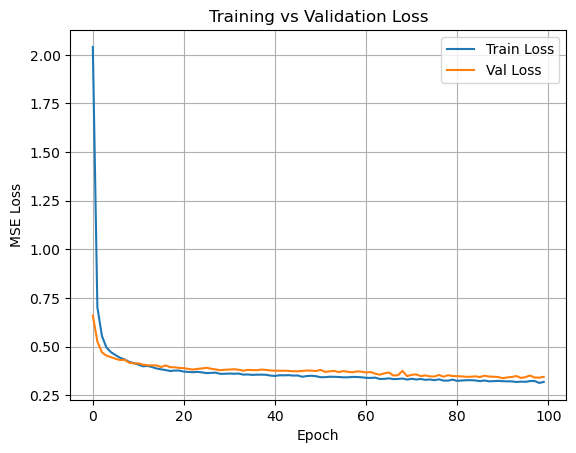

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
y_pred = model.predict(X_test_scaled).flatten()  # Flatten to make it 1D like y_test

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


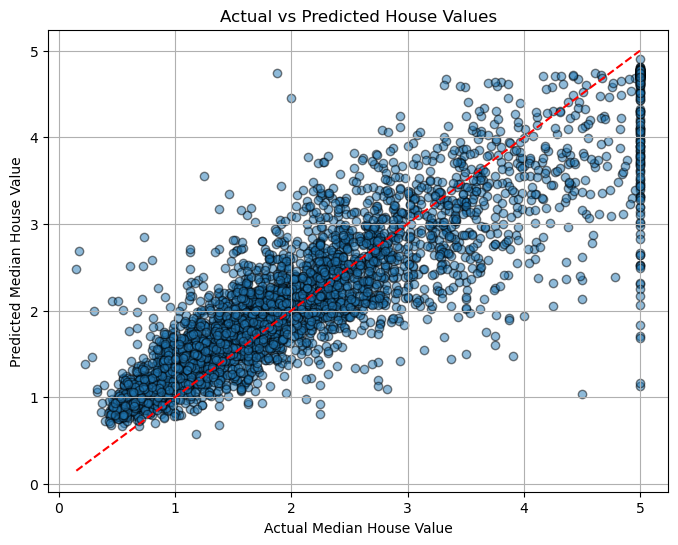

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted House Values')
plt.grid(True)
plt.show()